# Importing the libraries

In [1]:
# import matplotlib for test github
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10

from keras.models import Sequential
from keras.layers import Dense , Activationr  b

In [3]:
image_size = 32
num_channels = 3
num_features = image_size * image_size * num_channels
num_classes = 10
num_train = 49000

In [79]:
(X_train , y_train) , (X_test  , y_test) = cifar10.load_data()

In [80]:
print('Train data shape : {}'.format(X_train.shape))
print('Test data shape : {}'.format(X_test.shape))

Train data shape : (50000, 32, 32, 3)
Test data shape : (10000, 32, 32, 3)


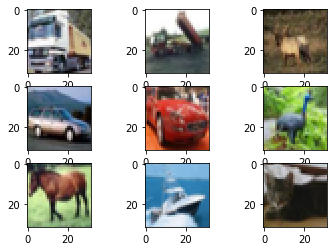

In [6]:
for i in range(1,10):
    plt.subplot(3,3,i)

    plt.imshow(X_train[i,:,:,:] , interpolation = 'nearest')


In [81]:
X_train = X_train.reshape([-1 , num_features])
X_test = X_test.reshape([-1 , num_features])


In [82]:
print('Train data shape : {}'.format(X_train.shape))
print('Test data shape : {}'.format(X_test.shape))

Train data shape : (50000, 3072)
Test data shape : (10000, 3072)


# Preprocessing

In [83]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

mu = np.mean(X_train , axis = 0)

X_train -= mu
X_train /= 255

X_test -= mu
X_test/= 255


In [84]:
y_train = keras.utils.to_categorical(y_train , num_classes)
y_test = keras.utils.to_categorical(y_test , num_classes)

In [85]:
y_train.shape

(50000, 10)

In [86]:
X_test.shape

(10000, 3072)

# model

In [13]:
model = Sequential()

model.add(Dense(num_classes , input_shape = (num_features,) , activation = 'softmax'))


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


# trian

In [15]:
model.compile(optimizer = 'sgd' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])



In [16]:
history = model.fit(X_train[: num_train],
                y_train[: num_train],
                epochs = 20 , 
                batch_size = 512,
                verbose = 2,
                validation_data = (X_train[num_train:] , y_train[num_train :]),
                    shuffle = True)

Epoch 1/20
96/96 - 9s - loss: 2.1189 - accuracy: 0.2314 - val_loss: 2.0317 - val_accuracy: 0.2980
Epoch 2/20
96/96 - 0s - loss: 1.9793 - accuracy: 0.3039 - val_loss: 1.9550 - val_accuracy: 0.3330
Epoch 3/20
96/96 - 0s - loss: 1.9244 - accuracy: 0.3334 - val_loss: 1.9137 - val_accuracy: 0.3570
Epoch 4/20
96/96 - 0s - loss: 1.8916 - accuracy: 0.3480 - val_loss: 1.8882 - val_accuracy: 0.3630
Epoch 5/20
96/96 - 0s - loss: 1.8692 - accuracy: 0.3576 - val_loss: 1.8703 - val_accuracy: 0.3650
Epoch 6/20
96/96 - 0s - loss: 1.8522 - accuracy: 0.3645 - val_loss: 1.8561 - val_accuracy: 0.3750
Epoch 7/20
96/96 - 0s - loss: 1.8389 - accuracy: 0.3696 - val_loss: 1.8456 - val_accuracy: 0.3810
Epoch 8/20
96/96 - 0s - loss: 1.8280 - accuracy: 0.3743 - val_loss: 1.8364 - val_accuracy: 0.3810
Epoch 9/20
96/96 - 0s - loss: 1.8189 - accuracy: 0.3783 - val_loss: 1.8271 - val_accuracy: 0.3910
Epoch 10/20
96/96 - 0s - loss: 1.8110 - accuracy: 0.3810 - val_loss: 1.8215 - val_accuracy: 0.3870
Epoch 11/20
96/96 -

In [17]:
model.save('linear_model.h5')

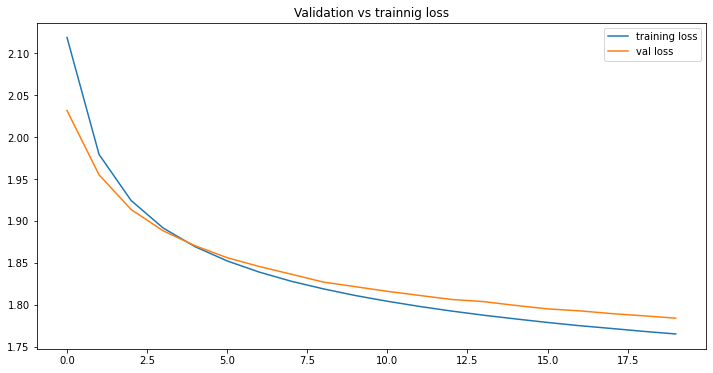

In [18]:
plt.figure(figsize = (12, 6))

plt.plot(history.history['loss']  , label = 'training loss')
plt.plot(history.history['val_loss']  , label = 'val loss')
plt.legend()
plt.title('Validation vs trainnig loss')
plt.show()

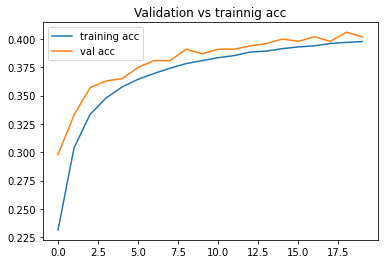

In [19]:


plt.plot(history.history['accuracy']  , label = 'training acc')
plt.plot(history.history['val_accuracy']  , label = 'val acc')
plt.legend()
plt.title('Validation vs trainnig acc')
plt.show()

# prediction

In [20]:
#select 50 index from test set
idx = np.random.choice(X_test.shape[0] , size = 50 )

#predicted classs
y_pred = model.predict_classes(X_test[idx])

#true class for selected image
y_true = y_test[idx].argmax(axis = 1)


print('The accuracy for selected image is {} %'.format(100 * np.mean(y_true == y_pred)))

C:\Users\USER\anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


The accuracy for selected image is 30.0 %


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

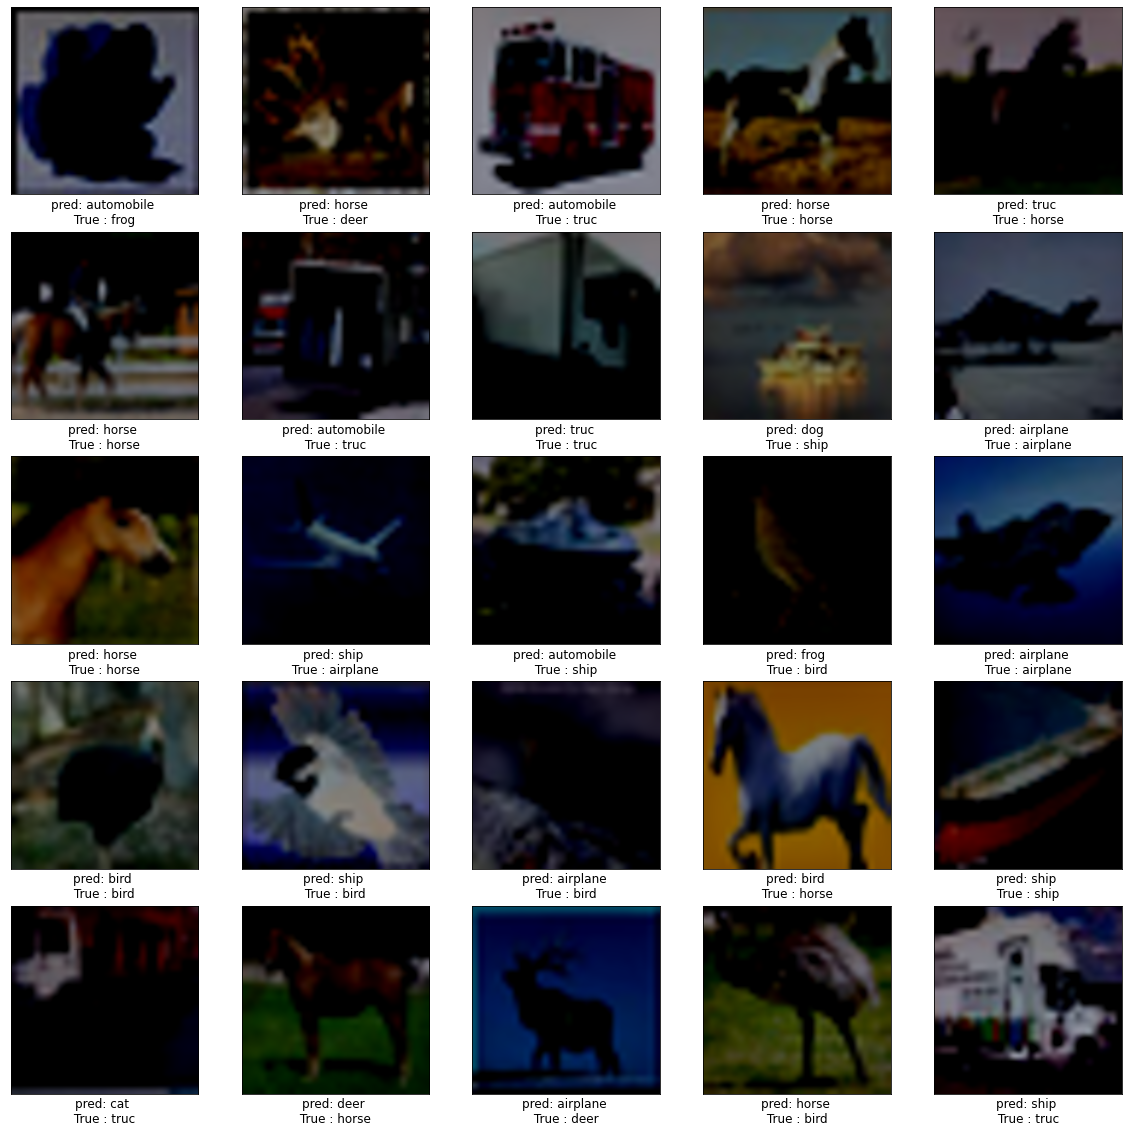

In [21]:
classes  = ['airplane' , 'automobile' , 'bird' , 'cat' , 'deer' , 'dog' , 'frog' , 'horse' , 'ship' , 'truc']


fig , axes = plt.subplots(5 , 5 , figsize = (20 , 20))

for i , ax in enumerate(axes.flat):
    ax.imshow(X_test[idx[i]].reshape(image_size , image_size , num_channels) , interpolation = 'spline16')
    
    pred_class = classes[y_pred[i]]
    true_class = classes[y_true[i]]
    
    ax.set_xlabel('pred: {} \n True : {} '.format(pred_class , true_class) , fontsize = 12)
    ax.set_xticks([])
    ax.set_yticks([])
    

# Multi-layer NN 

In [22]:
model1 = Sequential([
    keras.layers.BatchNormalization(),
    Dense(200 , input_shape = (num_features,)),
    keras.layers.Activation("relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate = 0.2),
    Dense(100),
    keras.layers.Activation("relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate = 0.2),
    Dense(50 ),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dropout(rate = 0.2),
    Dense(10 , activation = 'softmax' )
])



In [23]:
model1.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'] )

history = model1.fit(X_train[: num_train],
                y_train[: num_train],
                epochs = 20 , 
                batch_size = 512,
                verbose = 2,
                validation_data = (X_train[num_train:] , y_train[num_train :]),
                    shuffle = True)

Epoch 1/20
96/96 - 9s - loss: 1.9523 - accuracy: 0.3110 - val_loss: 1.7680 - val_accuracy: 0.3720
Epoch 2/20
96/96 - 2s - loss: 1.6817 - accuracy: 0.4011 - val_loss: 1.6557 - val_accuracy: 0.4290
Epoch 3/20
96/96 - 2s - loss: 1.5866 - accuracy: 0.4337 - val_loss: 1.5123 - val_accuracy: 0.4700
Epoch 4/20
96/96 - 2s - loss: 1.5152 - accuracy: 0.4628 - val_loss: 1.4197 - val_accuracy: 0.4990
Epoch 5/20
96/96 - 1s - loss: 1.4644 - accuracy: 0.4787 - val_loss: 1.3708 - val_accuracy: 0.5190
Epoch 6/20
96/96 - 1s - loss: 1.4209 - accuracy: 0.4949 - val_loss: 1.3248 - val_accuracy: 0.5220
Epoch 7/20
96/96 - 1s - loss: 1.3856 - accuracy: 0.5068 - val_loss: 1.3357 - val_accuracy: 0.5170
Epoch 8/20
96/96 - 1s - loss: 1.3492 - accuracy: 0.5207 - val_loss: 1.3027 - val_accuracy: 0.5190
Epoch 9/20
96/96 - 1s - loss: 1.3287 - accuracy: 0.5256 - val_loss: 1.2896 - val_accuracy: 0.5330
Epoch 10/20
96/96 - 1s - loss: 1.2991 - accuracy: 0.5385 - val_loss: 1.2535 - val_accuracy: 0.5430
Epoch 11/20
96/96 -

In [24]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, 3072)              12288     
_________________________________________________________________
dense_1 (Dense)              (None, 200)               614600    
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 200)               0         
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 200)               800       
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
module_wrapper_4 (ModuleWrap (None, 100)              

# Evaluate on test set

In [25]:
model1.evaluate(X_test,  y_test)    

313/313 [==============================] - 0s 826us/step - loss: 1.2666 - accuracy: 0.5522


[1.2665845155715942, 0.5522000193595886]

# CNN ON CIFAR10

In [97]:
X_train = X_train.reshape(-1 , image_size , image_size , num_channels)
X_test = X_test.reshape(-1 , image_size , image_size , num_channels)



In [34]:
from keras.layers import Conv2D,MaxPool2D,Flatten,Dropout

In [35]:
def create_cnn():
    model = Sequential()
    
    #conv block1
    model.add(Conv2D(64 , (3,3) , activation = 'relu' , padding = 'same' , input_shape = X_train.shape[1:]))
    model.add(Conv2D(64 , (3,3) , activation = 'relu'))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Dropout(rate = 0.2))
    
    #conv block 2
    
    model.add(Conv2D(128 , (3,3) , activation = 'relu' , padding = 'same' , input_shape = X_train.shape[1:]))
    model.add(Conv2D(128 , (3,3) , activation = 'relu'))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Dropout(rate = 0.2))
    
    #conv block 3
    
    model.add(Conv2D(256 , (3,3) , activation = 'relu' , padding = 'same' , input_shape = X_train.shape[1:]))
    model.add(Conv2D(256 , (3,3) , activation = 'relu'))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Dropout(rate = 0.2))
    
    #classifier
    model.add(Flatten())
    model.add(Dense(128 , activation = 'relu'))
    model.add(Dropout(rate = 0.2))
    model.add(Dense(10 , activation = 'softmax'))
    
    return model
model = create_cnn()

In [38]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       73856     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)        

In [50]:

model.compile(optimizer = 'Adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])




In [51]:

model.fit(X_train[:num_train] , y_train[:num_train] , 
          validation_data = (X_train[num_train:] , y_train[num_train:] ),
         batch_size = 256 , epochs = 5)

Epoch 1/5
192/192 [==============================] - 121s 627ms/step - loss: 1.9554 - accuracy: 0.2602 - val_loss: 1.3390 - val_accuracy: 0.5240
Epoch 2/5
192/192 [==============================] - 121s 628ms/step - loss: 1.3227 - accuracy: 0.5205 - val_loss: 1.0675 - val_accuracy: 0.6200
Epoch 3/5
192/192 [==============================] - 123s 640ms/step - loss: 1.0552 - accuracy: 0.6210 - val_loss: 0.8747 - val_accuracy: 0.6920
Epoch 4/5
192/192 [==============================] - 123s 642ms/step - loss: 0.8799 - accuracy: 0.6911 - val_loss: 0.7734 - val_accuracy: 0.7380
Epoch 5/5
192/192 [==============================] - 124s 644ms/step - loss: 0.7465 - accuracy: 0.7373 - val_loss: 0.7154 - val_accuracy: 0.7590


In [54]:
model.save('CNN.WEIGHT.h5')

In [66]:
from keras.preprocessing.image import ImageDataGenerator

epochs = 5
batch_size = 256


datagen = ImageDataGenerator(width_shift_range=0.1 , height_shift_range=0.1,
                            horizontal_flip=True , vertical_flip=False , 
                            rotation_range=0 , featurewise_center = False , samplewise_center = False)

datagen.fit(X_train[:num_train])
model.fit_generator(datagen.flow(X_train[:num_train] , y_train[:num_train] , batch_size = batch_size) , 
                    epochs = epochs , steps_per_epoch = num_train // batch_size , 
                    validation_data = (X_train[num_train:] , y_train[num_train:]))

Epoch 1/5
191/191 [==============================] - 115s 602ms/step - loss: 0.7574 - accuracy: 0.7386 - val_loss: 0.6244 - val_accuracy: 0.7810
Epoch 2/5
191/191 [==============================] - 117s 614ms/step - loss: 0.7101 - accuracy: 0.7550 - val_loss: 0.6828 - val_accuracy: 0.7690
Epoch 3/5
191/191 [==============================] - 119s 624ms/step - loss: 0.6751 - accuracy: 0.7672 - val_loss: 0.6459 - val_accuracy: 0.7880
Epoch 4/5
191/191 [==============================] - 120s 627ms/step - loss: 0.6350 - accuracy: 0.7811 - val_loss: 0.5601 - val_accuracy: 0.8050
Epoch 5/5
191/191 [==============================] - 119s 624ms/step - loss: 0.6051 - accuracy: 0.7916 - val_loss: 0.5798 - val_accuracy: 0.8050


In [67]:
model.save('CNN_AUMENTED.h5')

In [69]:
model = keras.models.load_model('CNN_AUMENTED.h5')

In [71]:
model.evaluate(X_test,  y_test)

313/313 [==============================] - 6s 19ms/step - loss: 0.6010 - accuracy: 0.7959


[0.6009628176689148, 0.7958999872207642]

In [72]:
print("The accuracy on the test set is " , 79.58 , '%')

The accuracy on the test set is  79.58 %


In [92]:
y_test = np.argmax(y_test , axis = 1)




AxisError: axis 1 is out of bounds for array of dimension 1

In [99]:


idx = np.random.choice(len(X_test) , 10 , replace = False)

p = model.predict(X_test[idx])


<Figure size 864x1728 with 0 Axes>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

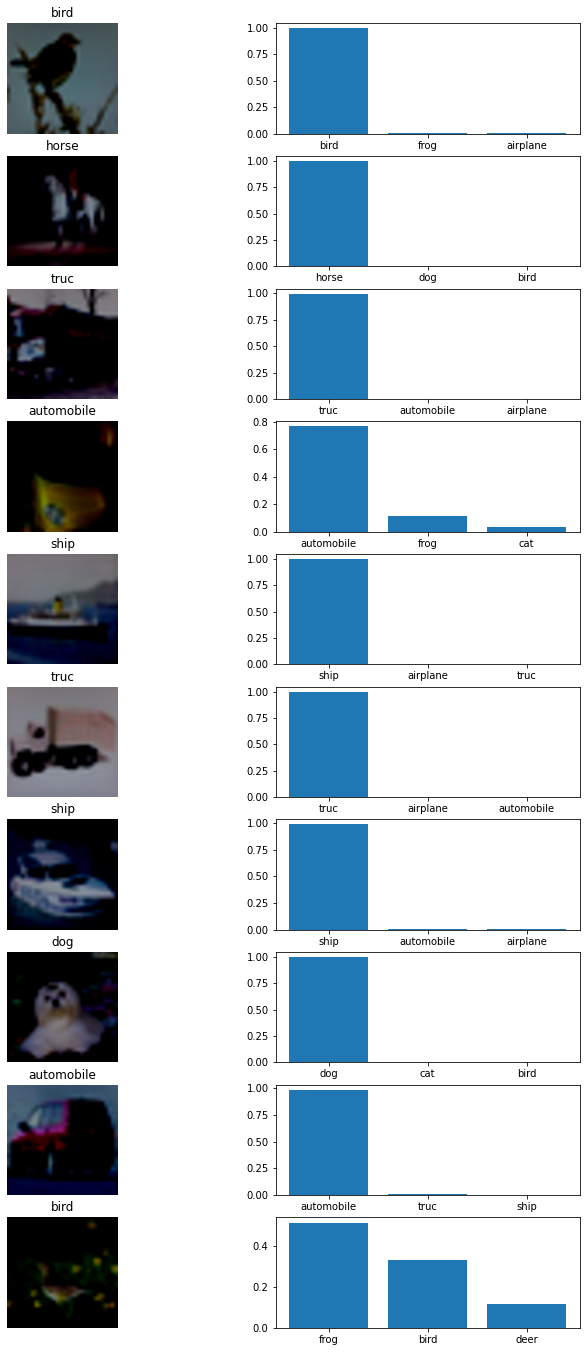

In [132]:
plt.figure(figsize = (12 , 24))
for i in range(len(idx)):
    plt.subplot(10 , 2 , 2 * i + 1)
    plt.imshow(X_test[idx[i]] , interpolation = 'spline16')
    plt.title(classes[y_test[idx[i]]])
    plt.axis('off')
    plt.grid(False)
    
    pred_label = np.argsort(-p[i])[:3]
    pred_prob = [p[i][l] for l in pred_label]
    pred_label = [classes[l] for l in pred_label]
    
    plt.subplot(10 , 2 , 2*i + 2)
    plt.bar(range(3) , pred_prob)
    plt.xticks(range(3),pred_label  )